In [18]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#dataset path
train_path = '/content/drive/MyDrive/SkinCancerData/Train'
test_path = '/content/drive/MyDrive/SkinCancerData/Test'

In [7]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=9,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [8]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(9, activation='softmax'))

In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 24,641,417
Trainable params: 1,053,705
Non-trainable params: 23,587,712
_________________________________________________________________


In [16]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [20]:
datagen = ImageDataGenerator()
train_set = datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2239 images belonging to 9 classes.


In [22]:
test_set = datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 118 images belonging to 9 classes.


In [23]:
history = resnet_model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
70/70 [==============================] - 1409s 20s/step - loss: 4.2366 - accuracy: 0.3577 - val_loss: 2.0290 - val_accuracy: 0.2881
Epoch 2/10
70/70 [==============================] - 54s 773ms/step - loss: 1.2157 - accuracy: 0.5721 - val_loss: 1.9218 - val_accuracy: 0.3390
Epoch 3/10
70/70 [==============================] - 54s 774ms/step - loss: 0.9964 - accuracy: 0.6427 - val_loss: 1.8204 - val_accuracy: 0.3898
Epoch 4/10
70/70 [==============================] - 54s 770ms/step - loss: 0.7909 - accuracy: 0.7146 - val_loss: 2.0980 - val_accuracy: 0.3475
Epoch 5/10
70/70 [==============================] - 54s 767ms/step - loss: 0.6181 - accuracy: 0.7767 - val_loss: 2.0392 - val_accuracy: 0.3390
Epoch 6/10
70/70 [==============================] - 54s 771ms/step - loss: 0.5463 - accuracy: 0.7990 - val_loss: 2.1030 - val_accuracy: 0.4153
Epoch 7/10
70/70 [==============================] - 54s 765ms/step - loss: 0.4329 - accuracy: 0.8437 - val_loss: 2.5961 - val_accuracy: 0.3559

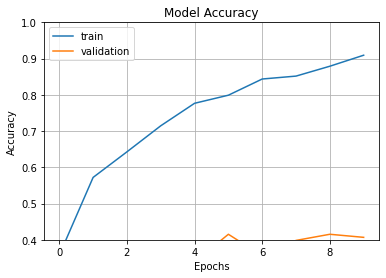

In [24]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()